In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from distributions import sample, expectation, Normal, Categorical, Mixture, PiecewiseUniform

%matplotlib inline

In [2]:
#μ= 0.0035,σ = 0.0409)
norm_mu = 0.0035 
norm_sigma = 0.0409

#0.9094 0.0906 0.0069 −0.0307 0.0298 0.0907
mix_pi1 = 0.9094
mix_mu1 = 0.0069
mix_sigma1 = 0.0298

mix_pi2 = 0.0906
mix_mu2 = -0.0307
mix_sigma2 = 0.0907

In [2]:
plt.rcParams["figure.figsize"] = np.array(plt.rcParams["figure.figsize"]) * 2


In [4]:
plt.rcParams.update({'font.size': 15})

# Best fit Normal

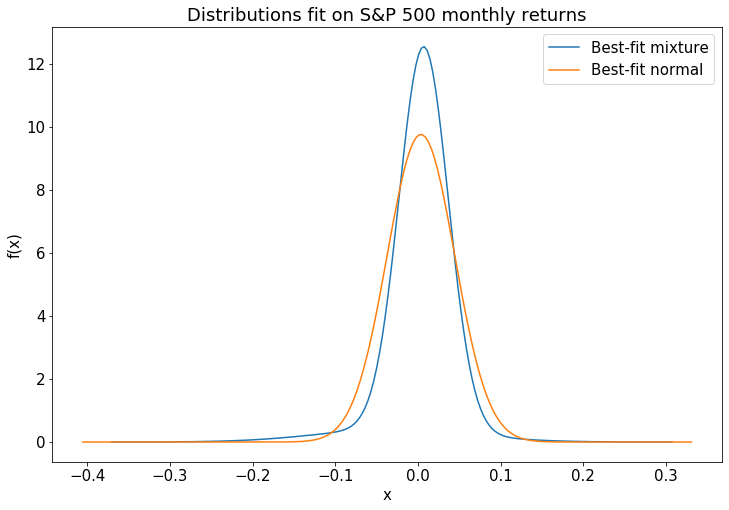

In [5]:
# Set-up.
n = 100000
np.random.seed(0)
# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1],
                        [mix_mu2, mix_sigma2]])

n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
#weights = np.ones(n_components, dtype=np.float64) / float(n_components)

weights = [mix_pi1, mix_pi2]

# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)

for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w

plt.plot(xs, ys, label = 'Best-fit mixture')
#plt.hist(y, density=True, bins="fd")
plt.xlabel("x")
plt.ylabel("f(x)")

mu = norm_mu
sigma = norm_sigma
x = np.linspace(mu - 10*sigma, mu + 8*sigma, 200)
plt.plot(x, ss.norm.pdf(x, mu, sigma), label = 'Best-fit normal')
plt.legend()
plt.title('Distributions fit on S&P 500 monthly returns')
plt.show()

# Mixture Components

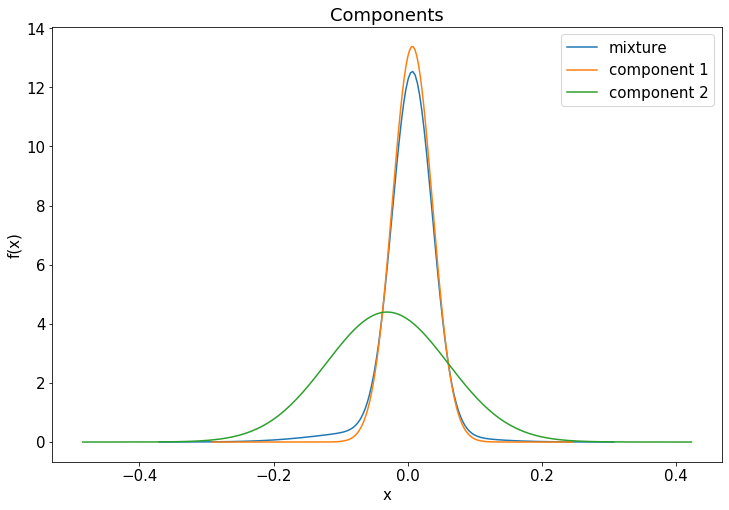

In [6]:
# Set-up.
n = 100000
np.random.seed(0)
# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1],
                        [mix_mu2, mix_sigma2]])

n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
#weights = np.ones(n_components, dtype=np.float64) / float(n_components)

weights = [mix_pi1, mix_pi2]

# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)

for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w

plt.plot(xs, ys, label = 'mixture')
#plt.hist(y, density=True, bins="fd")
plt.xlabel("x")
plt.ylabel("f(x)")

mu = mix_mu1
sigma = mix_sigma1
x = np.linspace(mu - 10*sigma, mu + 8*sigma, 200)
plt.plot(x, ss.norm.pdf(x, mu, sigma), label = 'component 1')
mu = mix_mu2
sigma = mix_sigma2
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 200)
plt.plot(x, ss.norm.pdf(x, mu, sigma), label = 'component 2')
plt.legend()
plt.title('Components')
plt.show()

# Different Probs

In [ ]:
# Set-up.
n = 100000
np.random.seed(0)
# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1],
                        [mix_mu2, mix_sigma2]])

n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
#weights = np.ones(n_components, dtype=np.float64) / float(n_components)


weights = [0.9, 0.1]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = '0.9')
#plt.hist(y, density=True, bins="fd")



weights = [0.8, 0.2]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = '0.8')
#plt.hist(y, density=True, bins="fd")


weights = [0.7, 0.3]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = '0.7')
#plt.hist(y, density=True, bins="fd")


plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title('Changing mixture probabilities')
plt.show()

# Different sigma1

In [ ]:
# Set-up.
n = 100000
np.random.seed(0)

n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
#weights = np.ones(n_components, dtype=np.float64) / float(n_components)



# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1],
                        [mix_mu2, mix_sigma2]])
weights = [0.9, 0.1]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = 'original')
#plt.hist(y, density=True, bins="fd")



# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1*1.25],
                        [mix_mu2, mix_sigma2]])
weights = [0.9, 0.1]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = 'x1.25')
#plt.hist(y, density=True, bins="fd")



# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1*1.5],
                        [mix_mu2, mix_sigma2]])
weights = [0.9, 0.1]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = 'x1.5')
#plt.hist(y, density=True, bins="fd")


plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title('Changing variance of major component')
plt.show()

# Different Sigma2

In [ ]:
# Set-up.
n = 100000
np.random.seed(0)

n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
#weights = np.ones(n_components, dtype=np.float64) / float(n_components)



# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1],
                        [mix_mu2, mix_sigma2]])
weights = [0.8, 0.2]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = 'original')
#plt.hist(y, density=True, bins="fd")



# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1],
                        [mix_mu2, mix_sigma2*2]])
weights = [0.8, 0.2]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(-0.4, 0.3, 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = 'x2')
#plt.hist(y, density=True, bins="fd")



# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1],
                        [mix_mu2, mix_sigma2*3]])
weights = [0.8, 0.2]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(-0.4, 0.3, 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = 'x3')
#plt.hist(y, density=True, bins="fd")


plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title('Changing variance of minor component')
plt.show()

In [ ]:
n = 100000
np.random.seed(0)

n_components = norm_params.shape[0]
# Parameters of the mixture components
norm_params = np.array([[mix_mu1, mix_sigma1],
                        [mix_mu2, mix_sigma2*10]])
weights = [0.9, 0.1]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=n, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)
# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(-0.4, 0.3, 200)
ys = np.zeros_like(xs)
for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w
plt.plot(xs, ys, label = 'x3')
plt.hist(y, density=True, bins="fd")


plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title('Changing variance of minor component')
plt.show()

In [ ]:
#mu = 0
#variance = 1
#sigma = math.sqrt(variance)
mu = norm_mu
sigma = norm_sigma
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 200)
plt.plot(x, ss.norm.pdf(x, mu, sigma))
plt.show()

In [ ]:
h1 = Normal(mix_mu1, mix_sigma1)
h2 = Normal(mix_mu2, mix_sigma2)
scale = 100000

In [ ]:
high_stakes1 = h1*100000
high_stakes2 = h2*100000
#low_stakes = Normal((0.25+0.01)/2, 0.3*(0.25-0.01))
reward = Mixture([high_stakes1, high_stakes2], [mix_pi1, mix_pi2])

for i in range(1000):
    print(sample(reward))

In [ ]:
reward.cdf(-50000)

In [ ]:
norm_params = np.array([[mix_mu1, mix_sigma1],
                        [mix_mu2, mix_sigma2*5]])
weights = [0.8, 0.2]
# A stream of indices from which to choose the component
mixture_idx = np.random.choice(n_components, size=100, replace=True, p=weights)
# y is the mixture sample
y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

In [ ]:
y.min()

In [ ]:
y.max()

In [ ]:
def convert_to_bins(dist, n=20, lower = -1, upper = 1):
    step = (upper-lower)/n
    
    i = lower
    bins = []
    probs = []
    while True:
        if i >=upper:
            break
        j = round(i + step, 2)
        
        bins.append((i, j))
        if i == lower:
            low = -np.inf
        else:
            low = i
        
        if abs(j - upper) < step/2:
            high = np.inf
        else:
            high = j
        
        probs.append(dist.cdf(high) - dist.cdf(low))
    
        i = j 
        
    return PiecewiseUniform(bins, probs)   

In [ ]:
h1 = Normal(mix_mu1, mix_sigma1)
h2 = Normal(mix_mu2, mix_sigma2)

reward = Mixture([h1, h2], [mix_pi1, mix_pi2])

In [ ]:
a = convert_to_bins(reward)

In [ ]:
sum(a.probabilities)

In [ ]:
def plot_bar(labels, probs):
    index = np.arange(len(labels))
    
    fig, axes = plt.subplots(2, sharex = True)
 
    fig.set_figheight(10 * 2)
    
    for ax in axes:
        ax.bar(index, probs)
        ax.set_title("3")
        #ax.bar(index, probs)
    #plt.bar(index, probs)

    plt.xlabel('Range')
    plt.ylabel('Density')
    plt.xticks(index, labels, rotation=30)
    #plt.title('Market Share for Each Genre 1995-2017')
    plt.show()

In [ ]:
plot_bar(a.intervals, a.probabilities)

In [ ]:
mix_pi1 = 0.9094
mix_mu1 = 0.0069
mix_sigma1 = 0.03

mix_pi2 = 0.0906
mix_mu2 = -0.0307
mix_sigma2 = 0.09

In [ ]:
mix_mu1*0.9 + mix_mu2*0.1

In [ ]:
'a {}'.format(4)

In [ ]:
mu1_list = [mix_mu1*1.5,]
mu2_list = [mix_mu2*3,]
#sigma1_list = [mix_sigma1, mix_sigma1*2]
#sigma2_list = [mix_sigma2, mix_sigma2*2, mix_sigma2*3]
sigma1_list = [mix_sigma1*2, mix_sigma1*4]
sigma2_list = [mix_sigma2*2, mix_sigma2*4, mix_sigma2*5]
pi_list = [0.85, 0.65]

In [ ]:
def create_plots():
    n = len(mu1_list)*len(mu2_list)*len(sigma1_list)*len(sigma2_list)*len(pi_list)
    fig, axes = plt.subplots(n, sharex = True)
    fig.set_figheight(10*n)
    fig.set_figwidth(20)
    i = 0
    xs = 0
    
    for mu1 in mu1_list:
        for mu2 in mu2_list:
            for sigma1 in sigma1_list:
                for sigma2 in sigma2_list:
                    for pi1 in pi_list:
                        pi2 = 1 - pi1
                        
                        h1 = Normal(mu1, sigma1)
                        h2 = Normal(mu2, sigma2)
                        
                        reward = Mixture([h1, h2], [pi1, pi2])
                        bins = convert_to_bins(reward)
                        
                        labels = bins.intervals
                        probs = bins.probabilities
                        index = np.arange(len(labels))
                        
                        axes[i].bar(index, probs)
                        name = 'mu1 = {}, mu2 = {}, sigma1 = {}, sigma2 = {}, pi1 = {}'.format(mu1, mu2, sigma1, sigma2, pi1)
                        axes[i].set_title(name)
                        axes[i].set_ylabel('Density')
                        
                        i+=1
                        xs = labels
    plt.xlabel('Range')
    #plt.ylabel('Density')
    plt.xticks(np.arange(len(xs)), xs, rotation=30)
    #plt.title('Market Share for Each Genre 1995-2017')
    plt.show()                   

In [ ]:
#create_plots()

In [ ]:
def create_plots2():
    n = len(mu1_list)*len(mu2_list)*len(sigma1_list)*len(sigma2_list)
    fig, axes = plt.subplots(n, len(pi_list), sharex = True)
    fig.set_figheight(10*n)
    fig.set_figwidth(20*len(pi_list))
    i = 0
    xs = 0
    
    for mu1 in mu1_list:
        for mu2 in mu2_list:
            for sigma2 in sigma2_list:
                for sigma1 in sigma1_list:
                    j = 0
                    for pi1 in pi_list:
                        pi2 = 1 - pi1
                        
                        h1 = Normal(mu1, sigma1)
                        h2 = Normal(mu2, sigma2)
                        
                        reward = Mixture([h1, h2], [pi1, pi2])
                        bins = convert_to_bins(reward)
                        print(bins.mu)
                        labels = bins.intervals
                        probs = bins.probabilities
                        index = np.arange(len(labels))
                        
                        axes[i][j].bar(index, probs)
                        name = 'mu1 = {}, mu2 = {}, sigma1 = {}, sigma2 = {}, pi1 = {}'.format(mu1, mu2, sigma1, sigma2, pi1)
                        axes[i][j].set_title(name)
                        axes[i][j].set_ylabel('Density')
                        
                        j+=1
                        plt.xticks(rotation = 30)
                        xs = labels
                    i+=1
    
    #plt.ylabel('Density')
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(np.arange(len(xs)), xs, rotation=30)
        plt.xlabel('Range')
    #plt.xticks(np.arange(len(xs)), xs, rotation=30)
    #plt.title('Market Share for Each Genre 1995-2017')
    plt.show()  
    fig.savefig('t1.png', dpi=fig.dpi)

In [ ]:
create_plots2()

# Stable Distributions

In [3]:
from scipy.stats import levy_stable

In [4]:
alpha = 1.2
beta = -0.75
mu1 = -0.12
sigma1 = 0.12

mu2 = -0.12
sigma2 = 0.18

In [5]:
def convert_to_bins_stable(alpha, beta, mu, sigma, n=10, lower = -1, upper = 1):
    step = (upper-lower)/n
    
    i = lower
    bins = []
    probs = []
    while True:
        if i >=upper:
            break
        j = round(i + step, 2)
        
        bins.append((i, j))
        if i == lower:
            low = -np.inf
        else:
            low = i
        
        if abs(j - upper) < step/2:
            high = np.inf
        else:
            high = j
        
        probs.append(levy_stable.cdf(high, alpha, beta, loc=mu, scale=sigma) - levy_stable.cdf(low, alpha, beta, loc=mu, scale=sigma))
    
        i = j 
        
    return PiecewiseUniform(bins, probs) 

In [5]:
a = convert_to_bins_stable(alpha, beta, mu1, sigma1)

In [6]:
a.mu

0.04582560961134732

In [7]:
sum(a.probabilities[:5])

0.30108582600951195

In [8]:
a.intervals

[(-1, -0.8),
 (-0.8, -0.6),
 (-0.6, -0.4),
 (-0.4, -0.2),
 (-0.2, 0.0),
 (0.0, 0.2),
 (0.2, 0.4),
 (0.4, 0.6),
 (0.6, 0.8),
 (0.8, 1.0)]

In [9]:
np.repeat(a.probabilities/2, 2)

array([0.02282523, 0.02282523, 0.00782137, 0.00782137, 0.01403319,
       0.01403319, 0.02957342, 0.02957342, 0.07628971, 0.07628971,
       0.19182155, 0.19182155, 0.1390934 , 0.1390934 , 0.01155541,
       0.01155541, 0.00263939, 0.00263939, 0.00434734, 0.00434734],
      dtype=float32)

In [10]:
b = convert_to_bins_stable(alpha, beta, mu2, sigma2)

In [11]:
b.mu

0.14147461280226709

In [12]:
sum(b.probabilities[:5])

0.2567711602896452

In [13]:
np.repeat(b.probabilities/2, 2)

array([0.03204786, 0.03204786, 0.00903497, 0.00903497, 0.01441053,
       0.01441053, 0.0250555 , 0.0250555 , 0.04783672, 0.04783672,
       0.09499531, 0.09499531, 0.15004343, 0.15004343, 0.09885027,
       0.09885027, 0.01740059, 0.01740059, 0.01032482, 0.01032482],
      dtype=float32)

In [14]:
def plot_bar_stable(labels, probs):
    index = np.arange(len(labels))
    
    #fig, axes = plt.subplots(2, sharex = True)
 
    #fig.set_figheight(10 * 2)
    
    #for ax in axes:
    #    ax.bar(index, probs)
    #    ax.set_title("3")
        #ax.bar(index, probs)
    plt.bar(index, probs)

    plt.xlabel('Range')
    plt.ylabel('Density')
    plt.xticks(index, labels, rotation=30)
    #plt.title('Market Share for Each Genre 1995-2017')
    plt.show()

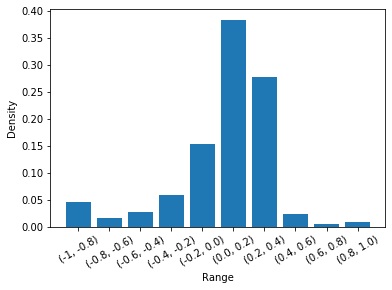

In [15]:
plot_bar_stable(a.intervals, a.probabilities)

In [16]:
a.mu

0.04582560961134732

In [6]:
alpha_list = [1.2, 1.4, 1.6,]
beta_list = [-0.7]
mu_list = [-0.07,0.01, 0.025]
sigma_list = [0.03, 0.08, 0.13, 0.18]

In [7]:
plt.rcParams.update({'font.size': 46})

In [8]:
stock_names = [["Apparel Company", "Construction Company", "Tech Firm", "Hedge Fund"], 
         ["Mutual Fund", "Bank", "Restaurant Chain", "Petroleum Company"],
         ["Law Firm", "Manufacturing Firm", "Pharmaceutical", "Biotech Company"]
        ]

In [9]:
stocks = []

def create_plots_stable():
    #n = len(mu_list)*len(alpha_list)*len(beta_list)
    n = len(alpha_list)*len(beta_list)
    fig, axes = plt.subplots(n, len(sigma_list), sharex = True, sharey = True)
    fig.set_figheight(10*n)
    fig.set_figwidth(20*len(sigma_list))
    i = 0
    xs = 0
    
    for ind in range(len(alpha_list)):
        for beta in beta_list:
            #for mu in mu_list:
            alpha = alpha_list[ind]
            j = 0
            for sigma in sigma_list:
                mu = mu_list[ind]*(j+1)/2
                bins = convert_to_bins_stable(alpha, beta, mu, sigma)
                print(bins.mu)
                labels = bins.intervals
                probs = bins.probabilities
                index = np.arange(len(labels))
                
                axes[i][j].bar(index, probs)
                #name = 'alpha = {}, beta = {}, sigma = {}, trunc_mean = {}'.format(alpha, beta, sigma, round(bins.mu, 3))
                name = stock_names[ind][j]
                axes[i][j].set_title(name)
                axes[i][j].set_ylabel('Density')
                
                stock = {}
                stock["name"] = name
                #stock["payoffs"] = [-95, -85, -75, -65, -55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
                #stock["payoffDistribution"] = list(np.repeat(bins.probabilities/2, 2))
                stock["expectedPayoff"] = bins.mu
                stocks.append(stock)
                j+=1
                xs = labels
            i+=1
    
    #plt.ylabel('Density')
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(np.arange(len(xs)), xs, rotation=30, ha="right", rotation_mode="anchor")
        ax.yaxis.set_tick_params(labelbottom=True)
        #plt.xlabel('Range')
    #plt.xlabel('Range')
    for a in axes[-1]:
        a.set_xlabel('Range')
        a.tick_params('x', length=20, width=2, which='major')
    #plt.xticks(np.arange(len(xs)), xs, rotation=30)
    #plt.title('Market Share for Each Genre 1995-2017')
    plt.show()  
    fig.savefig('stable2.png', dpi=fig.dpi)

0.016317690577125184
0.022435574326664213
0.06398754697293044
0.1059458963572979
0.034072809515055265
0.03287110348464921
0.06165615916252138
0.09231945164501668
0.03492554099648259
0.032262246997561306
0.05293573164381087
0.07572414074093102


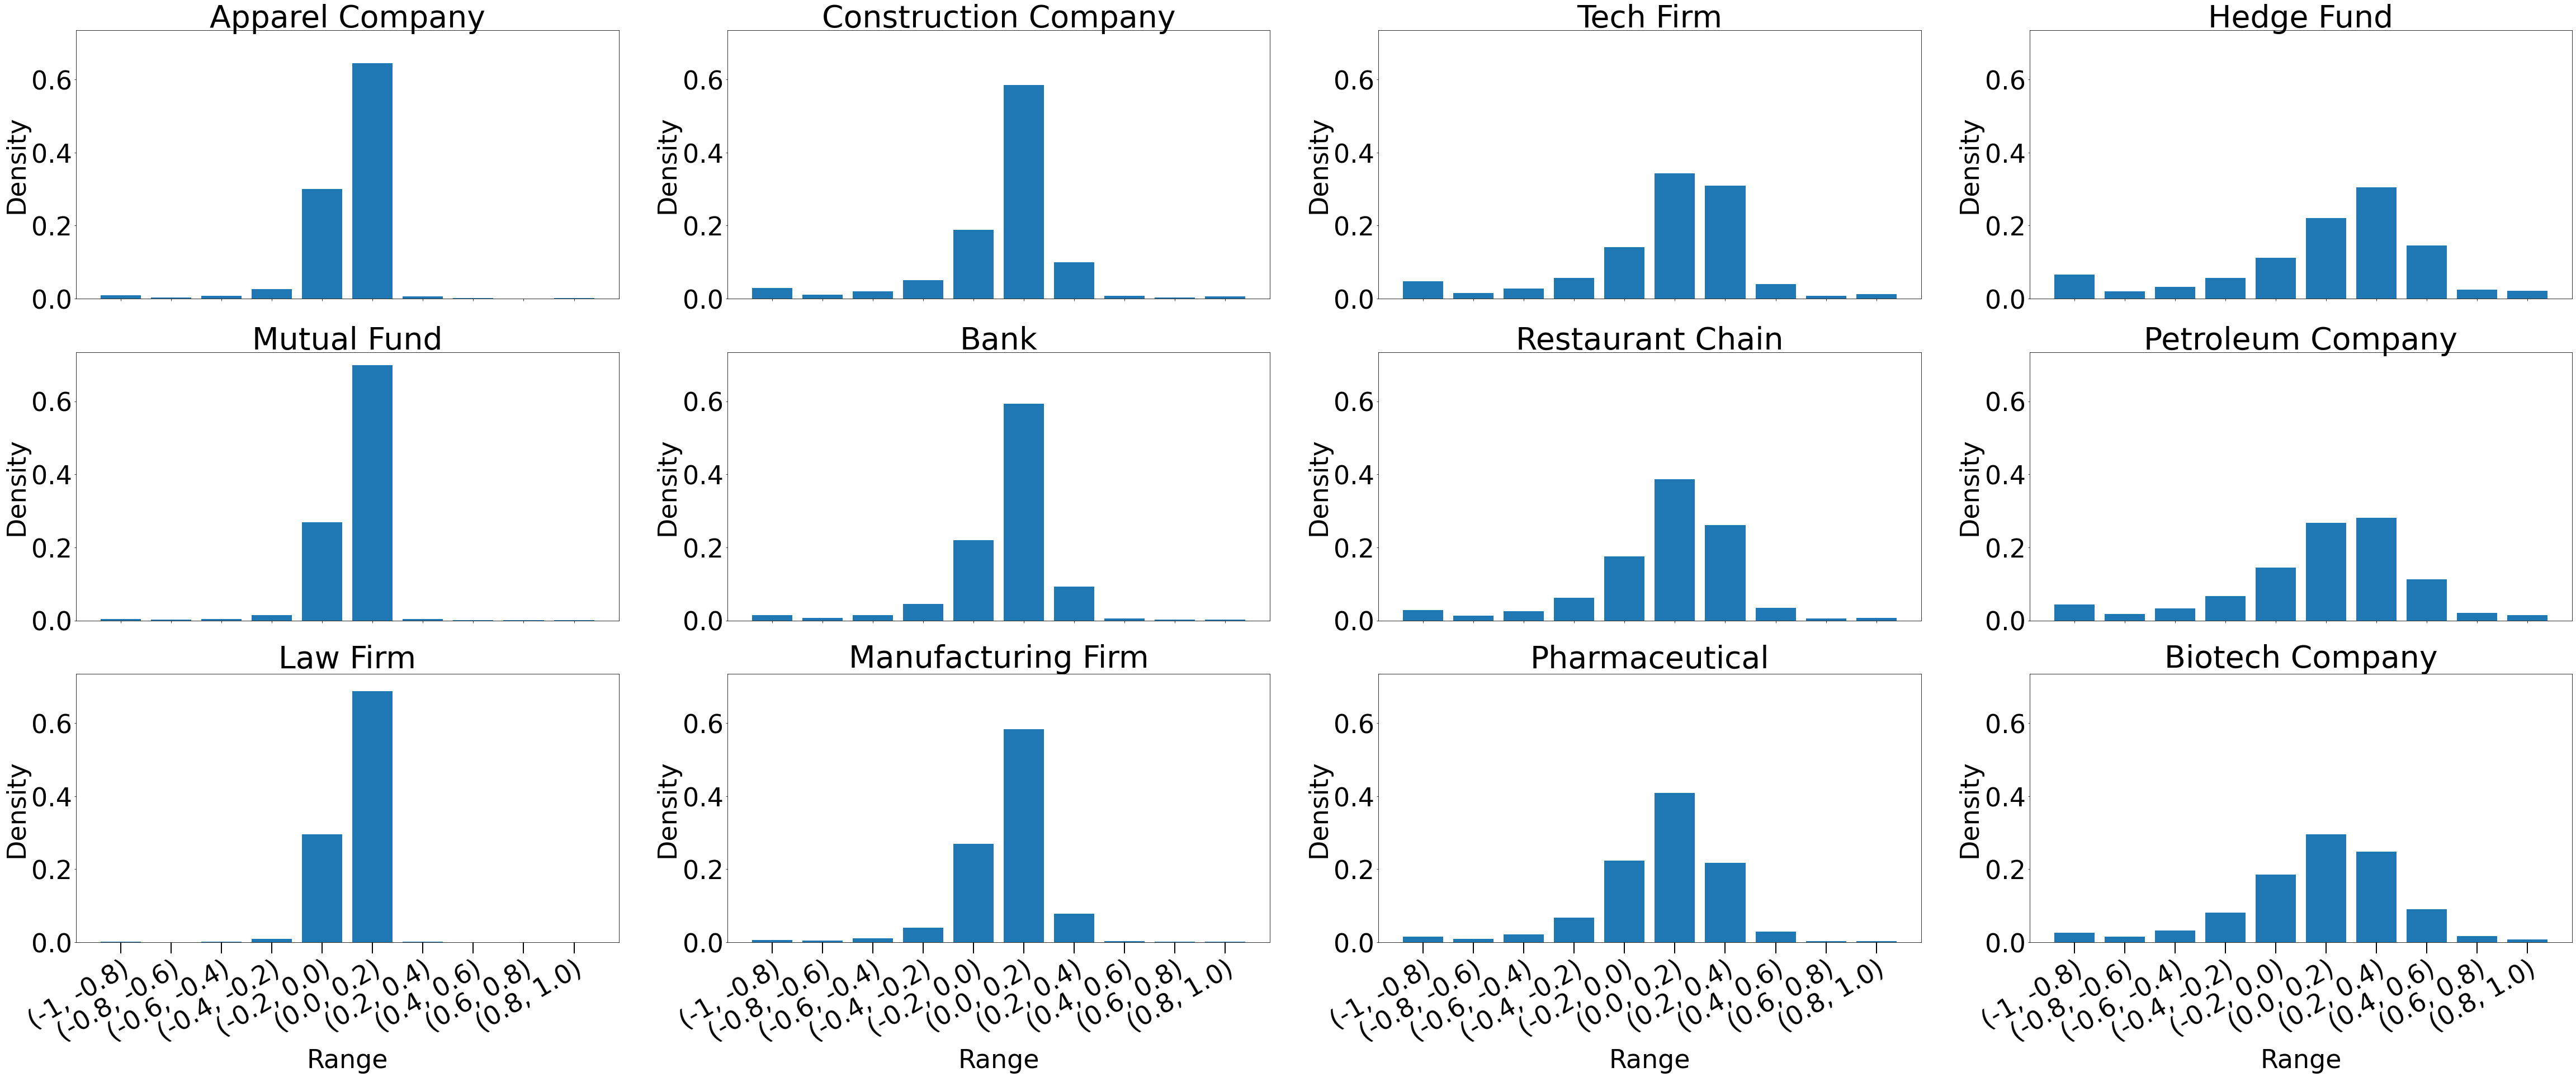

In [10]:
create_plots_stable()

In [23]:
stocks

[{'name': 'Apparel Company', 'expectedPayoff': 0.016317690577125184},
 {'name': 'Construction Company', 'expectedPayoff': 0.022435574326664213},
 {'name': 'Tech Firm', 'expectedPayoff': 0.06398754697293044},
 {'name': 'Hedge Fund', 'expectedPayoff': 0.1059458963572979},
 {'name': 'Mutual Fund', 'expectedPayoff': 0.034072809515055265},
 {'name': 'Bank', 'expectedPayoff': 0.03287110348464921},
 {'name': 'Restaurant Chain', 'expectedPayoff': 0.06165615916252138},
 {'name': 'Petroleum Company', 'expectedPayoff': 0.09231945164501668},
 {'name': 'Law Firm', 'expectedPayoff': 0.03492554099648259},
 {'name': 'Manufacturing Firm', 'expectedPayoff': 0.032262246997561306},
 {'name': 'Pharmaceutical', 'expectedPayoff': 0.05293573164381087},
 {'name': 'Biotech Company', 'expectedPayoff': 0.07572414074093102}]

In [148]:
ex = [0.000729982,   0.000729982,   0.00042183022,   0.00042183022,
    0.001036881,   0.001036881,   0.0043644197,   0.0043644197,
    0.14792138,   0.14792138,   0.34391165,   0.34391165,
    0.0011731221,   0.0011731221,   0.00022010434,   0.00022010434,
    0.00008394425,   0.00008394425,   0.00013669516,   0.00013669516]

In [149]:
sum(ex)

1.00000001754